In [49]:
import pandas as pd

abalone_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)
abalone_df.columns = ['Sex', 'Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
rings = abalone_df.Rings
abalone_df.drop('Rings', axis=1, inplace=True)

abalone_sc_df = abalone_df.copy()
abalone_sc_num_df = abalone_sc_df.select_dtypes([float]) 
abalone_sc_df[abalone_sc_num_df.columns] = (abalone_sc_num_df - abalone_sc_num_df.mean())/abalone_sc_num_df.std()
abalone_sc_df = pd.get_dummies(abalone_sc_df)

abalone_gsc_df = abalone_df.copy()
abalone_gsc_num_df = abalone_gsc_df.select_dtypes([float]) 
abalone_gsc_df[abalone_gsc_num_df.columns] = (abalone_gsc_num_df - abalone_gsc_num_df.mean())/(2*abalone_gsc_num_df.std())
abalone_gsc_df = pd.get_dummies(abalone_gsc_df)
# abalone_gsc_df = (abalone_df - abalone_df.mean())/(2*abalone_df.std())

In [50]:
abalone_sc_df.cov()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.143602,-0.257548,0.113946
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.147757,-0.263549,0.115793
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.138387,-0.242177,0.103790
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.138999,-0.260410,0.121410
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.122421,-0.243713,0.121292
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.143035,-0.259704,0.116669
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.142050,-0.255441,0.113391
Sex_F,0.143602,0.147757,0.138387,0.138999,0.122421,0.143035,0.142050,0.215047,-0.100555,-0.114492
Sex_I,-0.257548,-0.263549,-0.242177,-0.260410,-0.243713,-0.259704,-0.255441,-0.100555,0.218113,-0.117558
Sex_M,0.113946,0.115793,0.103790,0.121410,0.121292,0.116669,0.113391,-0.114492,-0.117558,0.232049


In [51]:
abalone_gsc_df.cov()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
Length,0.250000,0.246703,0.206888,0.231315,0.224478,0.225754,0.224426,0.071801,-0.128774,0.056973
Diameter,0.246703,0.250000,0.208421,0.231363,0.223291,0.224931,0.226332,0.073878,-0.131775,0.057896
Height,0.206888,0.208421,0.250000,0.204805,0.193743,0.199580,0.204335,0.069194,-0.121089,0.051895
Whole_weight,0.231315,0.231363,0.204805,0.250000,0.242351,0.241594,0.238839,0.069500,-0.130205,0.060705
Shucked_weight,0.224478,0.223291,0.193743,0.242351,0.250000,0.232990,0.220654,0.061211,-0.121857,0.060646
Viscera_weight,0.225754,0.224931,0.199580,0.241594,0.232990,0.250000,0.226914,0.071518,-0.129852,0.058334
Shell_weight,0.224426,0.226332,0.204335,0.238839,0.220654,0.226914,0.250000,0.071025,-0.127721,0.056696
Sex_F,0.071801,0.073878,0.069194,0.069500,0.061211,0.071518,0.071025,0.215047,-0.100555,-0.114492
Sex_I,-0.128774,-0.131775,-0.121089,-0.130205,-0.121857,-0.129852,-0.127721,-0.100555,0.218113,-0.117558
Sex_M,0.056973,0.057896,0.051895,0.060705,0.060646,0.058334,0.056696,-0.114492,-0.117558,0.232049


In [52]:
from sklearn.decomposition import PCA

In [53]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

def pca_results(dataframe, pca):


    dimensions = dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]

    components = pd.DataFrame(np.round(pca.components_, 4), columns = dataframe.columns)
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar', colormap=cm.viridis);
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [68]:
pca_gelman = PCA()
pca_standard = PCA()
pca_numerical = PCA()

pca_gelman.fit(abalone_gsc_df)
pca_numerical.fit(abalone_sc_df[abalone_gsc_num_df.columns])
pca_standard.fit(abalone_sc_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

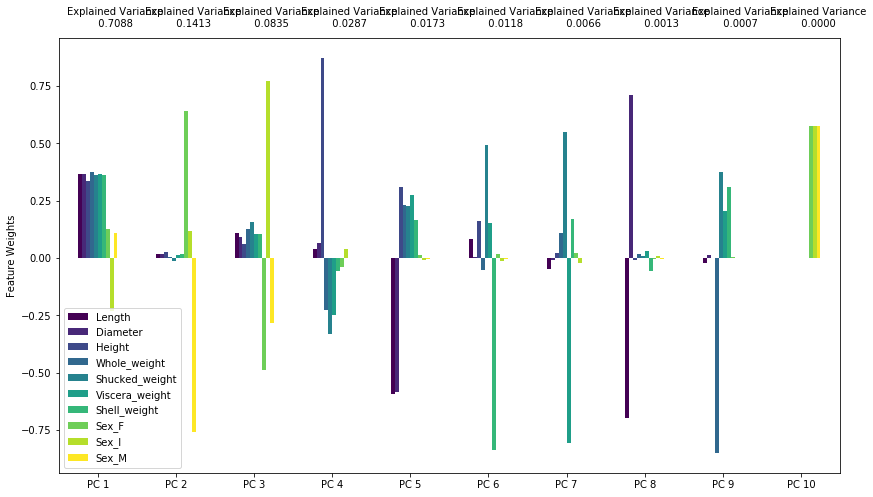

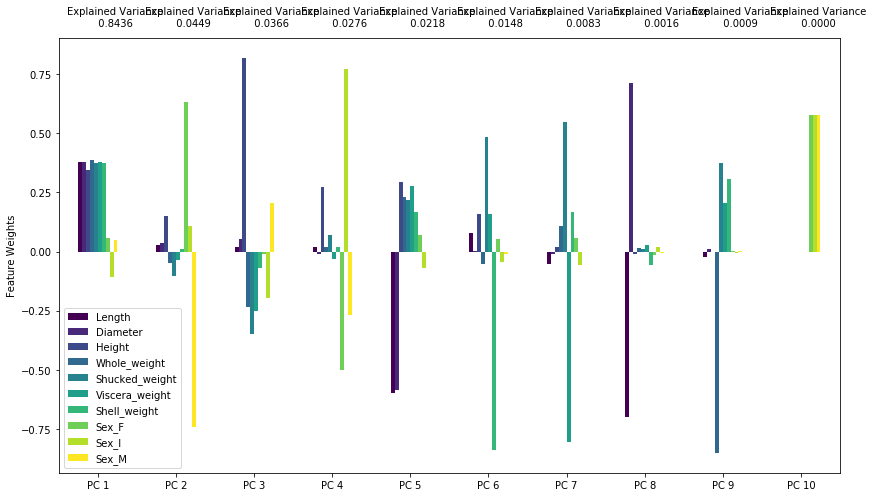

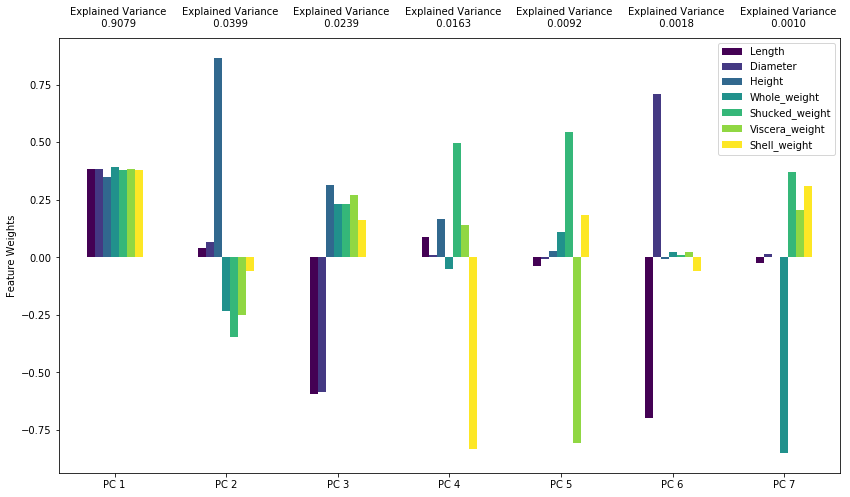

In [69]:
pca_results(abalone_gsc_df, pca_gelman)
pca_results(abalone_sc_df, pca_standard)
pca_results(abalone_sc_df[abalone_gsc_num_df.columns], pca_numerical);

In [56]:
import matplotlib.pyplot as plt

In [60]:
abalone_gsc_pca_df = pca_gelman.transform(abalone_gsc_df)
abalone_sc_pca_df = pca_standard.transform(abalone_sc_df)

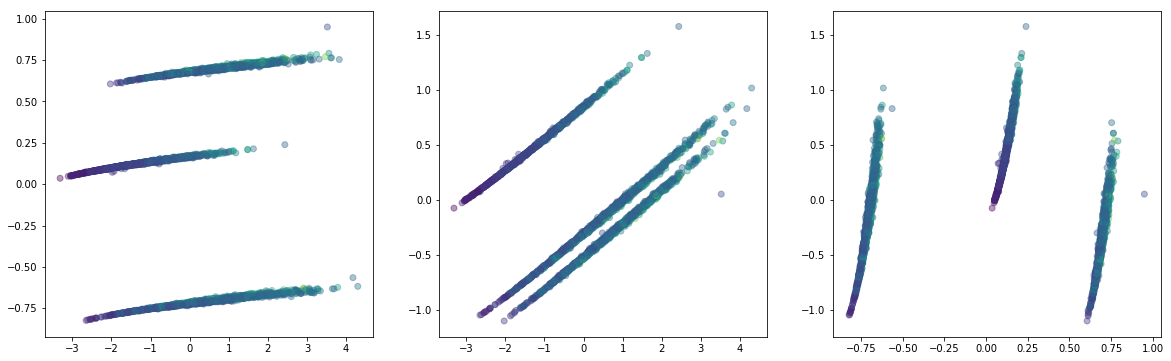

In [66]:
_, ax = plt.subplots(1,3, figsize=(20,6))
ax[0].scatter(abalone_gsc_pca_df[:,0], abalone_gsc_pca_df[:,1], c=rings, alpha=0.4)
ax[1].scatter(abalone_gsc_pca_df[:,0], abalone_gsc_pca_df[:,2], c=rings, alpha=0.4)
ax[2].scatter(abalone_gsc_pca_df[:,1], abalone_gsc_pca_df[:,2], c=rings, alpha=0.4)

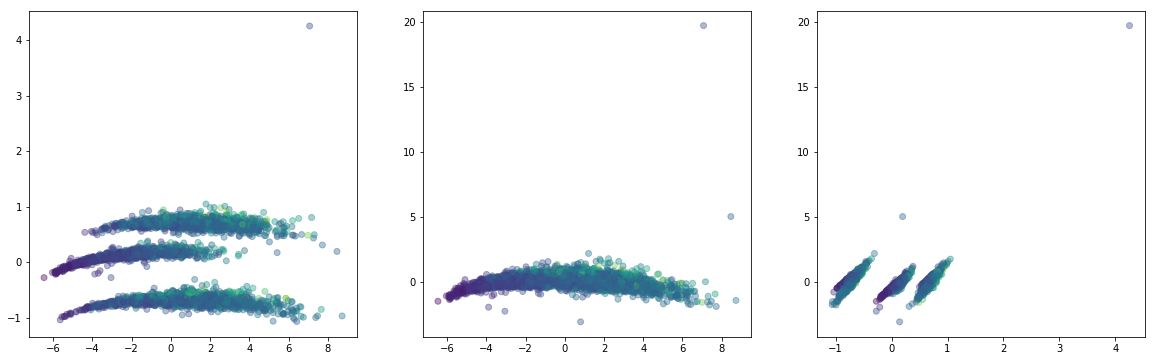

In [67]:
_, ax = plt.subplots(1,3, figsize=(20,6))
ax[0].scatter(abalone_sc_pca_df[:,0], abalone_sc_pca_df[:,1], c=rings, alpha=0.4)
ax[1].scatter(abalone_sc_pca_df[:,0], abalone_sc_pca_df[:,2], c=rings, alpha=0.4)
ax[2].scatter(abalone_sc_pca_df[:,1], abalone_sc_pca_df[:,2], c=rings, alpha=0.4)